# Lancer la session Spark

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("LSP @ECM - Projet AMIRI CARCASSES").master("local[*]").getOrCreate()

In [ ]:
# Vérification de la session Spark
try:
  spark.sparkContext.parallelize([1, 2, 3]).count()
  print("L'environnement Spark est fonctionnel.")
except Exception as e:
  print(f"Erreur : {e}")


L'environnement Spark est fonctionnel.


# Préparation des données via gdown

In [ ]:
!gdown --id 1l-JxqDaNWG885IOQd6ZC01mhB6zp0rc7 -O yelp_dataset-010.tar

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1l-JxqDaNWG885IOQd6ZC01mhB6zp0rc7
From (redirected): https://drive.google.com/uc?id=1l-JxqDaNWG885IOQd6ZC01mhB6zp0rc7&confirm=t&uuid=94e3592f-ae37-4474-9e39-c3a509e12000
To: /content/yelp_dataset-010.tar
100% 4.34G/4.34G [01:31<00:00, 47.4MB/s]


In [ ]:
!tar -tf yelp_dataset-010.tar

Dataset_User_Agreement.pdf
yelp_academic_dataset_business.json
yelp_academic_dataset_checkin.json
yelp_academic_dataset_review.json
yelp_academic_dataset_tip.json
yelp_academic_dataset_user.json


In [ ]:
!tar -xf yelp_dataset-010.tar

In [ ]:
import os

# Liste des fichiers JSON
json_files = [
    "yelp_academic_dataset_business.json",
    "yelp_academic_dataset_checkin.json",
    "yelp_academic_dataset_review.json",
    "yelp_academic_dataset_tip.json",
    "yelp_academic_dataset_user.json"
]

# Créer un dossier pour stocker les fichiers Parquet
os.makedirs("parquet_data", exist_ok=True)

# Conversion JSON → Parquet avec Spark
for json_file in json_files:
    print(f"Processing {json_file}...")

    # Charger le fichier JSON avec Spark
    df = spark.read.json(json_file)

    # Sauvegarder en format Parquet
    parquet_path = f"parquet_data/{json_file.replace('.json', '.parquet')}"
    df.write.mode("overwrite").parquet(parquet_path)

    print(f" {json_file} -> {parquet_path} done")

print("\n Conversion terminée ! Tous les fichiers sont dans 'parquet_data'.")


Processing yelp_academic_dataset_business.json...
 yelp_academic_dataset_business.json -> parquet_data/yelp_academic_dataset_business.parquet done
Processing yelp_academic_dataset_checkin.json...
 yelp_academic_dataset_checkin.json -> parquet_data/yelp_academic_dataset_checkin.parquet done
Processing yelp_academic_dataset_review.json...
 yelp_academic_dataset_review.json -> parquet_data/yelp_academic_dataset_review.parquet done
Processing yelp_academic_dataset_tip.json...
 yelp_academic_dataset_tip.json -> parquet_data/yelp_academic_dataset_tip.parquet done
Processing yelp_academic_dataset_user.json...
 yelp_academic_dataset_user.json -> parquet_data/yelp_academic_dataset_user.parquet done

 Conversion terminée ! Tous les fichiers sont dans 'parquet_data'.


# Préparation des données via Google Drive

In [ ]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/largeScaleProcessing/Yelp JSON'

# Check if the directory exists
if os.path.exists(folder_path):
    print(f"Le dossier '{folder_path}' existe.")

    # List files in the directory
    files_in_directory = os.listdir(folder_path)
    print("Fichiers dans le dossier :")
    for file in files_in_directory:
        print(file)

Mounted at /content/drive


In [ ]:
import tarfile
import os

tar_file_path = '/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/yelp_dataset.tar'

if os.path.exists(tar_file_path):
    print(f"Le fichier '{tar_file_path}' existe.")

    # Extract the contents of the .tar file
    try:
        with tarfile.open(tar_file_path, 'r') as tar:
            tar.extractall('/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder') # Specify the extraction path
        print(f"Le fichier '{tar_file_path}' a été extrait avec succès.")
    except Exception as e:
        print(f"Erreur lors de l'extraction du fichier : {e}")
else:
    print(f"Le fichier '{tar_file_path}' n'existe pas.")


Le fichier '/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/yelp_dataset.tar' n'existe pas.


In [ ]:
from pyspark.sql import SparkSession
from google.colab import drive
import tarfile
import os

# Specify the path to the extracted JSON files
extracted_folder_path = '/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder'

# Get a list of JSON files in the extracted folder
json_files = [f for f in os.listdir(extracted_folder_path) if f.endswith('.json')]

# Iterate through the first 5 JSON files (or all if less than 5 exist)
for json_file in json_files[:5]:
    json_file_path = os.path.join(extracted_folder_path, json_file)

    try:
        # Read the JSON file into a Spark DataFrame
        df = spark.read.json(json_file_path)

        # Specify the output path for the Parquet file
        parquet_file_path = os.path.join(extracted_folder_path, json_file.replace('.json', '.parquet'))

        # Write the DataFrame to a Parquet file
        df.write.parquet(parquet_file_path)
        print(f"Fichier '{json_file}' converti en Parquet avec succès.")

    except Exception as e:
        print(f"Erreur lors de la conversion de '{json_file}' : {e}")


Fichier 'yelp_academic_dataset_business.json' converti en Parquet avec succès.
Fichier 'yelp_academic_dataset_checkin.json' converti en Parquet avec succès.
Fichier 'yelp_academic_dataset_review.json' converti en Parquet avec succès.
Fichier 'yelp_academic_dataset_tip.json' converti en Parquet avec succès.
Fichier 'yelp_academic_dataset_user.json' converti en Parquet avec succès.


In [ ]:
# Specify the path to the extracted JSON files
extracted_folder_path = '/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder'

# Get all JSON files from the extracted directory
json_files = [
    os.path.join(extracted_folder_path, file)
    for file in os.listdir(extracted_folder_path)
    if file.endswith(".json")
]

# Function to display schema of a json file
def display_json_schema(file_path):
  try:
      with open(file_path, 'r', encoding='utf-8') as f:  # Handle potential encoding issues
          first_line = f.readline()
          data = json.loads(first_line) #Try to load the first line as json
          print(f"Schema for {file_path}:")
          print(json.dumps(data, indent=4)) #Display nicely formatted json
          print("-" * 30)
  except json.JSONDecodeError as e:
      print(f"Error decoding JSON in {file_path}: {e}")
  except Exception as e:
      print(f"An error occurred while processing {file_path}: {e}")


# Display schemas for the first few JSON files (or all if there are few)
for file_path in json_files[:5]:  # Display schema for the first 5 files
    display_json_schema(file_path)


Schema for /content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder/yelp_academic_dataset_business.json:
{
    "business_id": "Pns2l4eNsfO8kk83dixA6A",
    "name": "Abby Rappoport, LAC, CMQ",
    "address": "1616 Chapala St, Ste 2",
    "city": "Santa Barbara",
    "state": "CA",
    "postal_code": "93101",
    "latitude": 34.4266787,
    "longitude": -119.7111968,
    "stars": 5.0,
    "review_count": 7,
    "is_open": 0,
    "attributes": {
        "ByAppointmentOnly": "True"
    },
    "categories": "Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists",
    "hours": null
}
------------------------------
Schema for /content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder/yelp_academic_dataset_checkin.json:
{
    "business_id": "---kPU91CF4Lq2-WlRu9Lw",
    "date": "2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020-07-24 22:42:27, 2020-10-24 21:36:13, 2020-12-09 21:23:33, 2021-01-20 17:34:57, 2021-04-30 21

In [ ]:
# Specify the path to the directory containing the Parquet files
parquet_folder_path = '/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder'

# Get a list of Parquet files
parquet_files = [
    os.path.join(parquet_folder_path, file)
    for file in os.listdir(parquet_folder_path)
    if file.endswith(".parquet")
]

# Function to access and process data from a Parquet file
def process_parquet_file(file_path):
    try:
        # Read the Parquet file into a Spark DataFrame
        df = spark.read.parquet(file_path)

        # Display some information about the DataFrame (e.g., schema, first few rows)
        print(f"Processing: {file_path}")
        df.printSchema()
        df.show(5)  # Display the first 5 rows

        # Perform further analysis or operations on the DataFrame here...
        # For example, calculate summary statistics:
        # df.describe().show()

    except Exception as e:
        print(f"Error processing {file_path}: {e}")


# Process each Parquet file
for parquet_file in parquet_files:
    process_parquet_file(parquet_file)


Processing: /content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder/yelp_academic_dataset_business.parquet
root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 

In [ ]:
import pandas as pd

df_business = pd.read_parquet('/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder/yelp_academic_dataset_business.parquet')

state_agg = df_business.groupby('state').agg(
    nb_establishments=('business_id', 'count'),
    avg_reviews=('review_count', 'mean')
).reset_index()

print(state_agg.head())

  state  nb_establishments  avg_reviews
0    AB               5573    18.926431
1    AZ               9912    41.630246
2    CA               5203    65.277148
3    CO                  3    10.000000
4    DE               2265    29.743929


# Vue globale

In [ ]:
import pandas as pd
from IPython.display import display, HTML

# Chargement du dataset business
df_business = pd.read_parquet('/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder/yelp_academic_dataset_business.parquet')

# Calcul des KPIs
total_businesses = df_business['business_id'].nunique()
total_reviews = df_business['review_count'].sum()
avg_reviews_per_business = df_business['review_count'].mean()
avg_stars = df_business['stars'].mean()
open_businesses = df_business[df_business['is_open'] == 1].shape[0]
closed_businesses = df_business[df_business['is_open'] == 0].shape[0]

# Création d'un dictionnaire regroupant les KPIs
kpi_data = {
    "Nombre total d'établissements": total_businesses,
    "Total des avis": total_reviews,
    "Moyenne d'avis par établissement": f"{avg_reviews_per_business:.2f}",
    "Note moyenne globale": f"{avg_stars:.2f}",
    "Nombre d'établissements ouverts": open_businesses,
    "Nombre d'établissements fermés": closed_businesses
}

# Transformation du dictionnaire en DataFrame
kpi_df = pd.DataFrame(list(kpi_data.items()), columns=["Indicateur", "Valeur"])

# Affichage du titre et du tableau HTML stylisé
html_title = "<h2 style='text-align: center; color: darkblue;'>KPIs Globaux Yelp</h2>"
html_table = kpi_df.to_html(index=False, classes="table table-striped", border=0)

display(HTML(html_title))
display(HTML(html_table))

# Analyse géographique

## Densité du nombre d'établissement par État

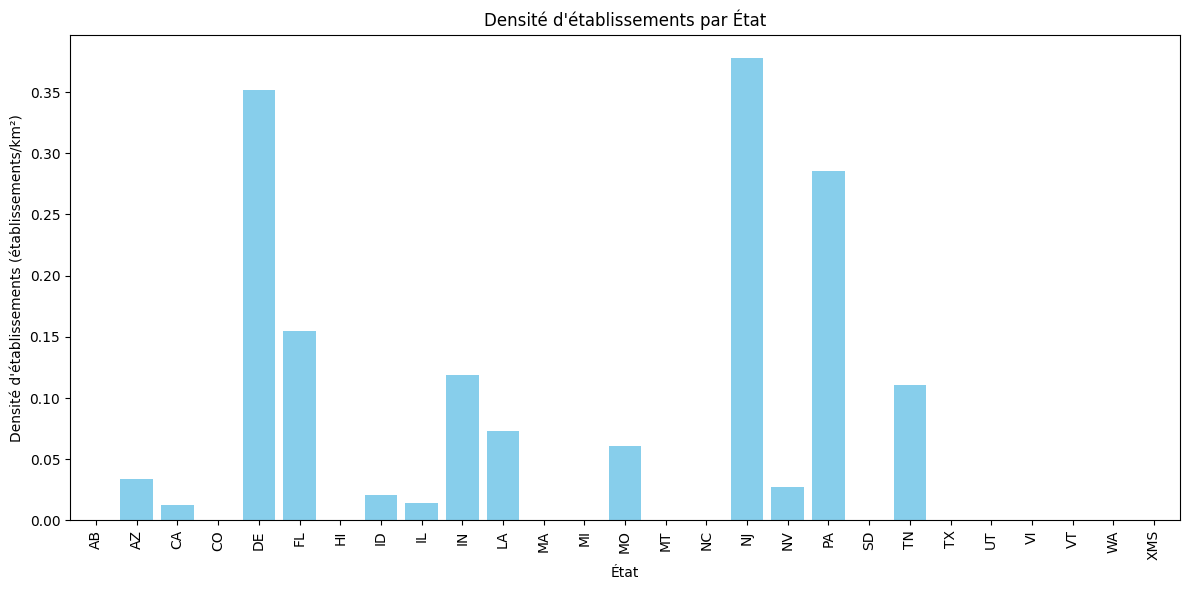

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Chargement du dataset business
df_business = pd.read_parquet('/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder/yelp_academic_dataset_business.parquet')

# Dictionnaire des superficies des états américains (en km²)
state_area = {
    'AL': 135767, 'AK': 1723337, 'AZ': 295234, 'AR': 137732, 'CA': 423967,
    'CO': 269601, 'CT': 14357,  'DE': 6446,   'FL': 170312, 'GA': 153910,
    'HI': 28313,  'ID': 216443, 'IL': 149995, 'IN': 94326,  'IA': 145746,
    'KS': 213100, 'KY': 104659, 'LA': 135659, 'ME': 91633,  'MD': 32131,
    'MA': 27336,  'MI': 250487, 'MN': 225163, 'MS': 121531, 'MO': 180540,
    'MT': 376962, 'NE': 200330, 'NV': 286380, 'NH': 24214,  'NJ': 22591,
    'NM': 314917, 'NY': 141297, 'NC': 139391, 'ND': 183108, 'OH': 116098,
    'OK': 181037, 'OR': 254799, 'PA': 119280, 'RI': 4001,   'SC': 82933,
    'SD': 199729, 'TN': 109153, 'TX': 695662, 'UT': 219882, 'VT': 24906,
    'VA': 110787, 'WA': 184661, 'WV': 62756,  'WI': 169635, 'WY': 253335
}

# Agrégation : nombre d'établissements par état
state_counts = df_business.groupby('state').agg(nb_establishments=('business_id', 'count')).reset_index()

# Calcul de la densité : nombre d'établissements par km² (si la superficie est connue)
state_counts['density'] = state_counts.apply(
    lambda row: row['nb_establishments'] / state_area.get(row['state'], np.nan), axis=1
)

# ----------------------------
# 1. Affichage de l'histogramme
# ----------------------------
plt.figure(figsize=(12, 6))
plt.bar(state_counts['state'], state_counts['density'], color='skyblue')
plt.xlabel('État')
plt.ylabel("Densité d'établissements (établissements/km²)")
plt.title("Densité d'établissements par État")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##Heatmap densité des établissements par état

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Chargement du dataset business
df_business = pd.read_parquet('/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder/yelp_academic_dataset_business.parquet')

# Dictionnaire des superficies des états américains (en km²)
state_area = {
    'AL': 135767, 'AK': 1723337, 'AZ': 295234, 'AR': 137732, 'CA': 423967,
    'CO': 269601, 'CT': 14357,  'DE': 6446,   'FL': 170312, 'GA': 153910,
    'HI': 28313,  'ID': 216443, 'IL': 149995, 'IN': 94326,  'IA': 145746,
    'KS': 213100, 'KY': 104659, 'LA': 135659, 'ME': 91633,  'MD': 32131,
    'MA': 27336,  'MI': 250487, 'MN': 225163, 'MS': 121531, 'MO': 180540,
    'MT': 376962, 'NE': 200330, 'NV': 286380, 'NH': 24214,  'NJ': 22591,
    'NM': 314917, 'NY': 141297, 'NC': 139391, 'ND': 183108, 'OH': 116098,
    'OK': 181037, 'OR': 254799, 'PA': 119280, 'RI': 4001,   'SC': 82933,
    'SD': 199729, 'TN': 109153, 'TX': 695662, 'UT': 219882, 'VT': 24906,
    'VA': 110787, 'WA': 184661, 'WV': 62756,  'WI': 169635, 'WY': 253335
}

# Agrégation : nombre d'établissements par état
state_counts = df_business.groupby('state').agg(nb_establishments=('business_id', 'count')).reset_index()

# Calcul de la densité : nombre d'établissements par km² (si la superficie est connue)
state_counts['density'] = state_counts.apply(
    lambda row: row['nb_establishments'] / state_area.get(row['state'], np.nan), axis=1
)

# ----------------------------
# 2. Affichage de la Heatmap avec folium
# ----------------------------
# On récupère la liste des coordonnées [latitude, longitude]
heat_data = df_business[['latitude', 'longitude']].dropna().values.tolist()

# Création d'une carte centrée sur les USA
m = folium.Map(location=[37.8, -96], zoom_start=4)

# Ajout de la heatmap
HeatMap(heat_data, radius=8, blur=4).add_to(m)

# Affichage de la carte directement dans le notebook
m

# Analyse Business

## Catégories d'établissements

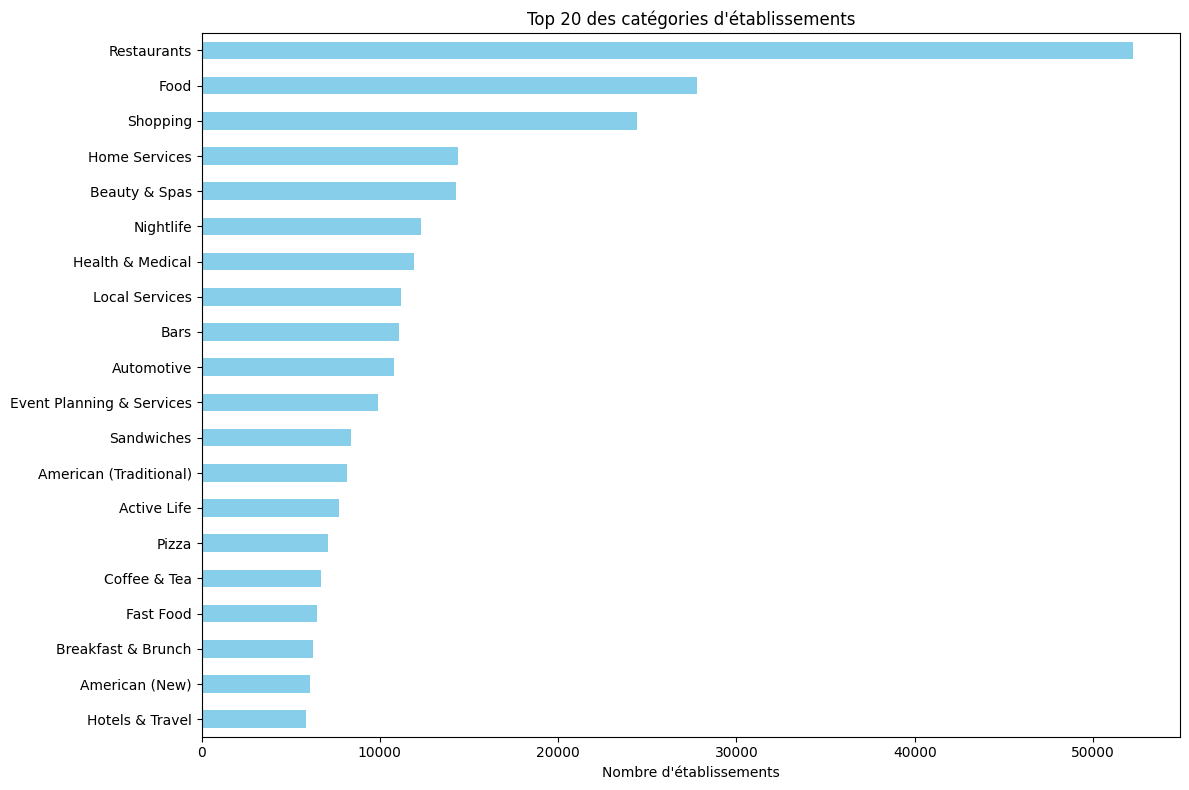

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du dataset business
df_business = pd.read_parquet('/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder/yelp_academic_dataset_business.parquet')

# Extraction et nettoyage de la colonne "categories"
# On ignore les valeurs manquantes et on sépare les catégories (supposées séparées par des virgules)
categories_series = df_business['categories'].dropna().apply(lambda x: [cat.strip() for cat in x.split(',')])

# Aplatir la liste des catégories pour obtenir un simple Series
all_categories = [cat for sublist in categories_series for cat in sublist]

# Comptage de la fréquence de chaque catégorie
cat_counts = pd.Series(all_categories).value_counts()

# Afficher les 20 catégories les plus fréquentes
top20 = cat_counts.head(20)

# Visualisation sous forme d'un diagramme en barres horizontal
plt.figure(figsize=(12, 8))
top20.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel("Nombre d'établissements")
plt.title("Top 20 des catégories d'établissements")
plt.tight_layout()
plt.show()

## Attributs des établissements

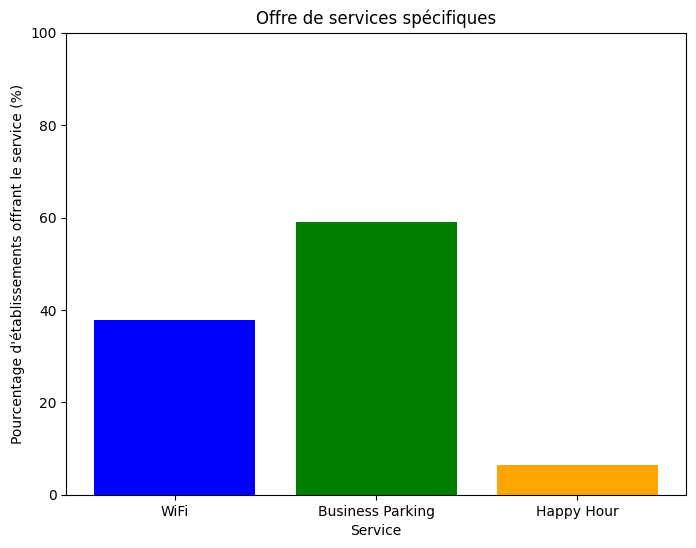

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Chargement du dataset business
df_business = pd.read_parquet('/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder/yelp_academic_dataset_business.parquet')

# Fonction pour extraire un attribut depuis la colonne "attributes"
def extract_attribute(attr, key):
    if pd.isna(attr):
        return None
    # Si l'attribut est déjà un dictionnaire
    if isinstance(attr, dict):
        return attr.get(key, None)
    # Sinon, on essaie d'évaluer la chaîne (dans le cas où c'est une chaîne représentant un dictionnaire)
    try:
        attr_dict = eval(attr)
        return attr_dict.get(key, None)
    except Exception:
        return None

# Extraction des attributs spécifiques
df_business['WiFi'] = df_business['attributes'].apply(lambda x: extract_attribute(x, 'WiFi'))
df_business['BusinessParking'] = df_business['attributes'].apply(lambda x: extract_attribute(x, 'BusinessParking'))
df_business['HappyHour'] = df_business['attributes'].apply(lambda x: extract_attribute(x, 'HappyHour'))

# Fonction pour déterminer si le service est offert
def service_offered(val):
    if pd.isna(val) or val is None:
        return False
    # Si la valeur est une chaîne, vérifier qu'elle n'indique pas un refus
    if isinstance(val, str):
        if val.lower() in ['false', 'no', 'none']:
            return False
        return True
    return bool(val)

# Création de colonnes indiquant si le service est offert
df_business['offers_WiFi'] = df_business['WiFi'].apply(service_offered)
df_business['offers_BusinessParking'] = df_business['BusinessParking'].apply(service_offered)
df_business['offers_HappyHour'] = df_business['HappyHour'].apply(service_offered)

# Calcul du nombre total d'établissements
total_businesses = len(df_business)

# Calcul des nombres d'établissements offrant chaque service
count_wifi = df_business['offers_WiFi'].sum()
count_parking = df_business['offers_BusinessParking'].sum()
count_happy = df_business['offers_HappyHour'].sum()

# Calcul des pourcentages par rapport au total
pct_wifi = (count_wifi / total_businesses) * 100
pct_parking = (count_parking / total_businesses) * 100
pct_happy = (count_happy / total_businesses) * 100

# Regroupement des résultats dans un DataFrame
services = ['WiFi', 'Business Parking', 'Happy Hour']
counts = [count_wifi, count_parking, count_happy]
percentages = [pct_wifi, pct_parking, pct_happy]

services_df = pd.DataFrame({
    'Service': services,
    "Nombre d'établissements": counts,
    "Pourcentage (%)": [f"{pct:.2f}%" for pct in percentages]
})

# Affichage du tableau HTML stylisé
display(HTML(services_df.to_html(index=False, classes="table table-striped", border=0)))

# Visualisation : Diagramme en barres pour les pourcentages
plt.figure(figsize=(8, 6))
plt.bar(services, percentages, color=['blue', 'green', 'orange'])
plt.xlabel('Service')
plt.ylabel("Pourcentage d'établissements offrant le service (%)")
plt.title("Offre de services spécifiques")
plt.ylim(0, 100)
plt.show()

In [ ]:
import pandas as pd
import folium
import requests
import numpy as np
from IPython.display import display

# --------------------------------------------------
# 1. Chargement du dataset et extraction des attributs
# --------------------------------------------------

# Chargement du dataset business
df_business = pd.read_parquet('/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder/yelp_academic_dataset_business.parquet')

# Fonction pour extraire un attribut depuis la colonne "attributes"
def extract_attribute(attr, key):
    if pd.isna(attr):
        return None
    if isinstance(attr, dict):
        return attr.get(key, None)
    try:
        attr_dict = eval(attr)
        return attr_dict.get(key, None)
    except Exception:
        return None

# Extraction des attributs spécifiques
df_business['WiFi'] = df_business['attributes'].apply(lambda x: extract_attribute(x, 'WiFi'))
df_business['BusinessParking'] = df_business['attributes'].apply(lambda x: extract_attribute(x, 'BusinessParking'))
df_business['HappyHour'] = df_business['attributes'].apply(lambda x: extract_attribute(x, 'HappyHour'))

# Fonction pour déterminer si le service est offert
def service_offered(val):
    if pd.isna(val) or val is None:
        return False
    if isinstance(val, str):
        if val.lower() in ['false', 'no', 'none']:
            return False
        return True
    return bool(val)

# Création de colonnes booléennes indiquant si le service est offert
df_business['offers_WiFi'] = df_business['WiFi'].apply(service_offered)
df_business['offers_BusinessParking'] = df_business['BusinessParking'].apply(service_offered)
df_business['offers_HappyHour'] = df_business['HappyHour'].apply(service_offered)

# --------------------------------------------------
# 2. Agrégation par état pour chaque service
# --------------------------------------------------

# Nombre total d'établissements par état
state_totals = df_business.groupby('state').size().reset_index(name='total')

# Dictionnaire reliant le nom du service à la colonne booléenne
services = {
    "WiFi": "offers_WiFi",
    "Business Parking": "offers_BusinessParking",
    "Happy Hour": "offers_HappyHour"
}

# --------------------------------------------------
# 3. Chargement du GeoJSON des états américains
# --------------------------------------------------

geojson_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
us_states_geo = requests.get(geojson_url).json()

# Vérification des identifiants dans le GeoJSON
geo_ids = [feature['id'] for feature in us_states_geo['features']]
print("IDs dans le GeoJSON:", geo_ids)

# --------------------------------------------------
# 4. Création d'une carte par service
# --------------------------------------------------

maps = {}  # Stockage des cartes

# Ici, on fixe l'échelle des seuils à [0, 20, 40, 60, 80, 100]
fixed_thresholds = [0, 20, 40, 60, 80, 100]

for service_label, col in services.items():
    # Comptage des établissements offrant le service par état
    service_counts = df_business.groupby('state')[col].sum().reset_index(name='count')

    # Fusion avec le total par état pour obtenir le pourcentage
    service_agg = pd.merge(state_totals, service_counts, on='state', how='left')
    service_agg['count'] = service_agg['count'].fillna(0)
    service_agg['percentage'] = (service_agg['count'] / service_agg['total']) * 100

    print(f"\nAgrégation pour {service_label}:")
    print(service_agg.head())

    # Création d'une carte centrée sur les USA
    m = folium.Map(location=[37.8, -96], zoom_start=4)

    # Ajout de la couche Choropleth
    folium.Choropleth(
        geo_data=us_states_geo,
        data=service_agg,
        columns=['state', 'percentage'],
        key_on='feature.id',  # Assurez-vous que vos états (df_business['state']) sont des abréviations comme "CA", "TX", etc.
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        nan_fill_color='white',
        threshold_scale=fixed_thresholds,
        legend_name=f"Pourcentage d'établissements offrant {service_label}"
    ).add_to(m)

    # Ajout de marqueurs pour afficher des popups d'information
    for _, row in service_agg.iterrows():
        lat_mean = df_business.loc[df_business['state'] == row['state'], 'latitude'].mean()
        lon_mean = df_business.loc[df_business['state'] == row['state'], 'longitude'].mean()
        if pd.notna(lat_mean) and pd.notna(lon_mean):
            folium.Marker(
                location=[lat_mean, lon_mean],
                popup=(f"État: {row['state']}<br>"
                       f"Total établissements: {int(row['total'])}<br>"
                       f"{service_label}: {int(row['count'])}<br>"
                       f"Pourcentage: {row['percentage']:.2f}%"),
                icon=folium.Icon(color='blue', icon='info-sign')
            ).add_to(m)

    maps[service_label] = m

# --------------------------------------------------
# 5. Affichage des cartes dans le notebook
# --------------------------------------------------
for service_label, carte in maps.items():
    print(f"Carte pour {service_label}:")
    display(carte)

IDs dans le GeoJSON: ['01', '02', '04', '05', '06', '08', '09', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48', '49', '50', '51', '53', '54', '55', '56', '72']

Agrégation pour WiFi:
  state  total  count  percentage
0    AB   5573   2153   38.632693
1    AZ   9912   3218   32.465698
2    CA   5203   1782   34.249471
3    CO      3      1   33.333333
4    DE   2265    933   41.192053

Agrégation pour Business Parking:
  state  total  count  percentage
0    AB   5573   3835   68.813924
1    AZ   9912   5140   51.856336
2    CA   5203   2683   51.566404
3    CO      3      1   33.333333
4    DE   2265   1414   62.428256

Agrégation pour Happy Hour:
  state  total  count  percentage
0    AB   5573    265    4.755069
1    AZ   9912    602    6.073446
2    CA   5203    308    5.919662
3    CO      3      0    0.000000
4

Carte pour Business Parking:


Carte pour Happy Hour:


# Analyse Client (dataset trop grande, pas testé)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du dataset des avis
df_review = pd.read_parquet('/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder/yelp_academic_dataset_review.parquet')

# Création d'un histogramme de la distribution des étoiles
plt.figure(figsize=(10, 6))
plt.hist(df_review['stars'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], color='skyblue', edgecolor='black')
plt.xlabel("Notes (stars)")
plt.ylabel("Nombre d'avis")
plt.title("Distribution des notes (stars) - Satisfaction client")
plt.xticks([1, 2, 3, 4, 5])
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# 1. Chargement des datasets
# ----------------------------

# Chargement du dataset des avis
df_review = pd.read_parquet('/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder/yelp_academic_dataset_review.parquet')

# Chargement du dataset des entreprises pour récupérer le "state"
df_business = pd.read_parquet('/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder/yelp_academic_dataset_business.parquet')

# ----------------------------
# 2. Fusion des datasets
# ----------------------------
# On fusionne sur 'business_id' pour associer à chaque avis l'état correspondant
df_merged = pd.merge(df_review, df_business[['business_id', 'state']], on='business_id', how='left')

# ----------------------------
# 3. Conversion de la date et regroupement mensuel
# ----------------------------
# Conversion de la colonne 'date' en datetime
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Définir 'date' comme index pour faciliter le resample
df_merged.set_index('date', inplace=True)

# Regroupement par état et par mois
# Calcul du nombre d'avis (review_id) et de la note moyenne (stars)
grouped = (
    df_merged.groupby('state')
    .resample('M')
    .agg({'review_id': 'count', 'stars': 'mean'})
    .rename(columns={'review_id': 'review_count', 'stars': 'avg_stars'})
    .reset_index()
)

# ----------------------------
# 4. Sélection des 5 états les plus actifs
# ----------------------------
# Calcul du total des avis par état pour sélectionner les top 5
state_totals = df_merged.groupby('state')['review_id'].count().reset_index(name='total_reviews')
top_states = state_totals.sort_values(by='total_reviews', ascending=False).head(5)['state'].tolist()

# Filtrage des données pour ne conserver que ces états
filtered = grouped[grouped['state'].isin(top_states)]

# ----------------------------
# 5. Tracé des graphiques linéaires
# ----------------------------

# Graphique 1 : Évolution du nombre d'avis au fil du temps (par état)
plt.figure(figsize=(12, 6))
for state in top_states:
    state_data = filtered[filtered['state'] == state]
    plt.plot(state_data['date'], state_data['review_count'], label=state)
plt.xlabel('Date')
plt.ylabel("Nombre d'avis")
plt.title("Évolution du nombre d'avis au fil du temps (Top 5 États)")
plt.legend()
plt.tight_layout()
plt.show()

# Graphique 2 : Évolution de la note moyenne au fil du temps (par état)
plt.figure(figsize=(12, 6))
for state in top_states:
    state_data = filtered[filtered['state'] == state]
    plt.plot(state_data['date'], state_data['avg_stars'], label=state)
plt.xlabel('Date')
plt.ylabel("Note moyenne")
plt.title("Évolution de la note moyenne au fil du temps (Top 5 États)")
plt.legend()
plt.tight_layout()
plt.show()

# Analyse Checkins

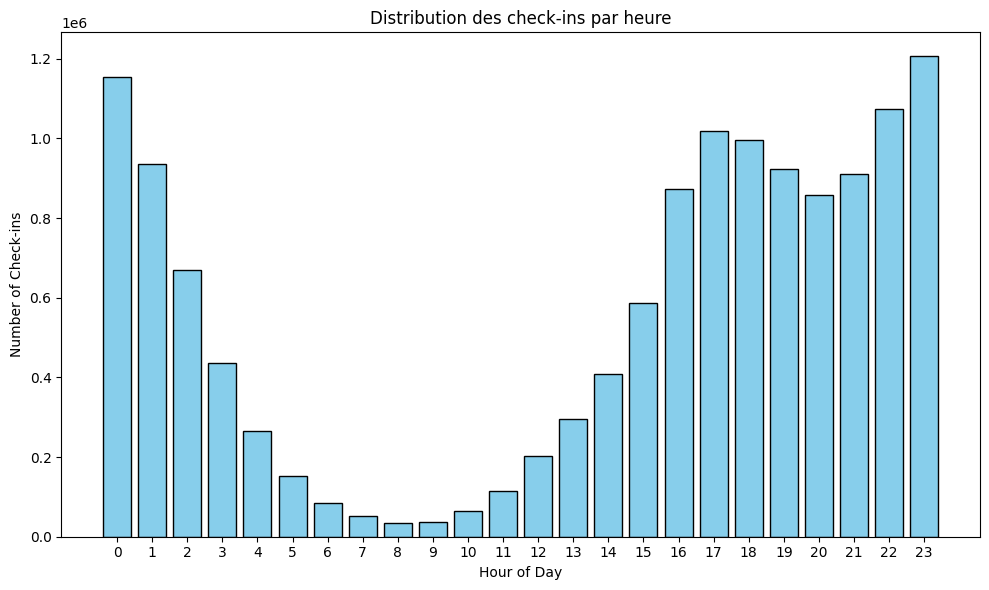

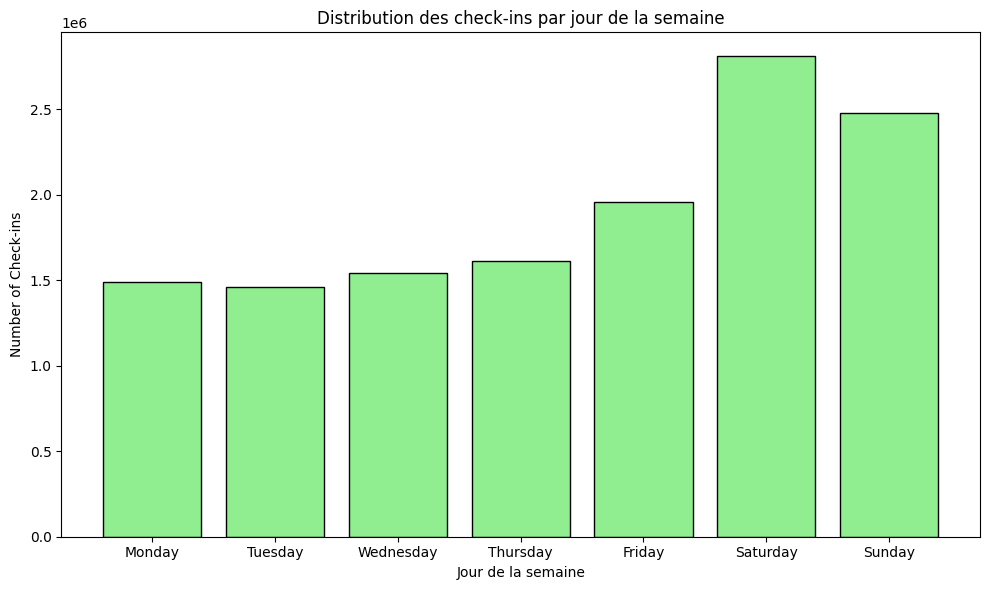

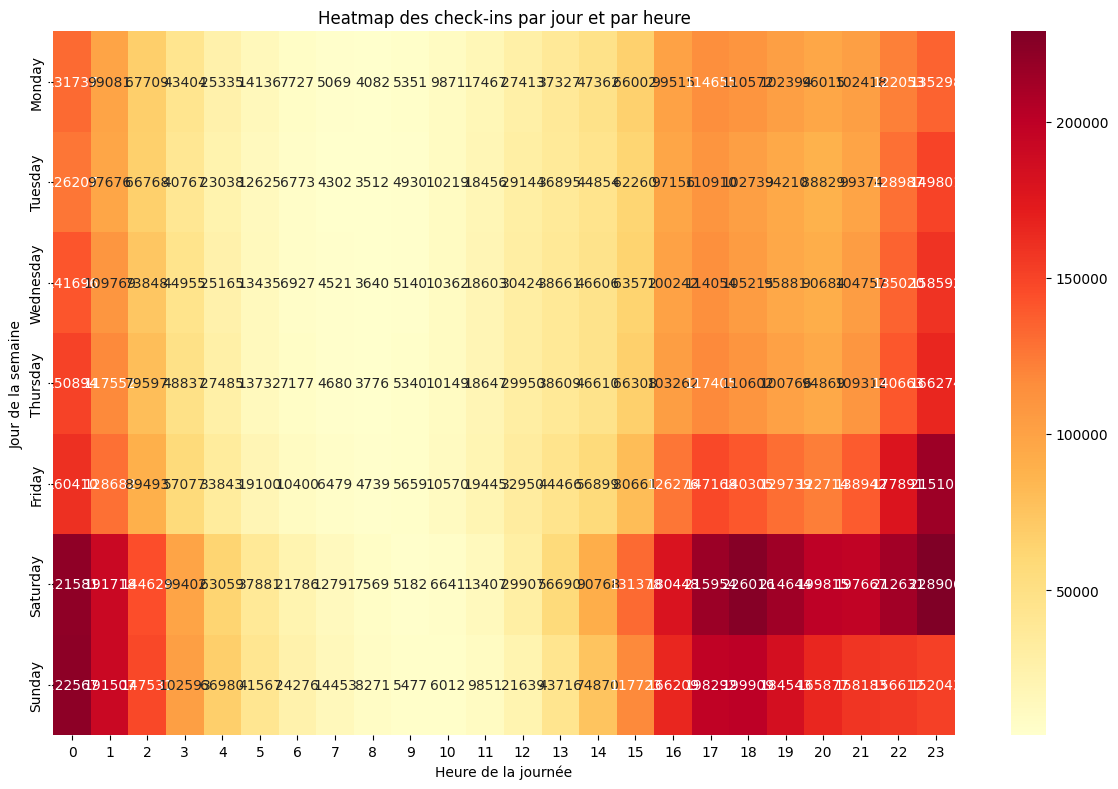

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Chargement et préparation des données
# ----------------------------

# Chargement du dataset des check-ins
df_checkin = pd.read_parquet('/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder/yelp_academic_dataset_checkin.parquet')

# La colonne 'date' contient plusieurs timestamps séparés par des virgules, on la sépare et on explode le DataFrame
df_checkin['date'] = df_checkin['date'].str.split(',')
df_checkin = df_checkin.explode('date')
df_checkin['date'] = df_checkin['date'].str.strip()

# Conversion en datetime en spécifiant le format (ex: "2020-03-13 21:10:56")
df_checkin['date'] = pd.to_datetime(df_checkin['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Suppression des lignes où la conversion a échoué
df_checkin = df_checkin.dropna(subset=['date'])

# Extraction de l'heure et du jour de la semaine
df_checkin['hour'] = df_checkin['date'].dt.hour
df_checkin['day_of_week'] = df_checkin['date'].dt.dayofweek  # Lundi=0, Dimanche=6

# Mapping des numéros de jour vers leur nom
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_checkin['day_of_week_name'] = df_checkin['day_of_week'].map(day_map)

# ----------------------------
# 2. Diagramme en barres : Fréquence par heure
# ----------------------------
hourly_counts = df_checkin.groupby('hour').size().sort_index()

plt.figure(figsize=(10,6))
plt.bar(hourly_counts.index, hourly_counts.values, color='skyblue', edgecolor='black')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Check-ins")
plt.title("Distribution des check-ins par heure")
plt.xticks(range(24))
plt.tight_layout()
plt.show()

# ----------------------------
# 3. Diagramme en barres : Fréquence par jour de la semaine
# ----------------------------
day_counts = df_checkin['day_of_week_name'].value_counts()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(ordered_days)

plt.figure(figsize=(10,6))
plt.bar(day_counts.index, day_counts.values, color='lightgreen', edgecolor='black')
plt.xlabel("Jour de la semaine")
plt.ylabel("Number of Check-ins")
plt.title("Distribution des check-ins par jour de la semaine")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Heatmap : Check-ins par jour et par heure
# ----------------------------
# Création d'une table pivot (jour x heure)
heatmap_data = df_checkin.groupby(['day_of_week_name', 'hour']).size().unstack(fill_value=0)
heatmap_data = heatmap_data.reindex(ordered_days)

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt="d")
plt.title("Heatmap des check-ins par jour et par heure")
plt.xlabel("Heure de la journée")
plt.ylabel("Jour de la semaine")
plt.tight_layout()
plt.show()

<ipython-input-4-0df289fb15e0>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df_checkin.resample('M').size()


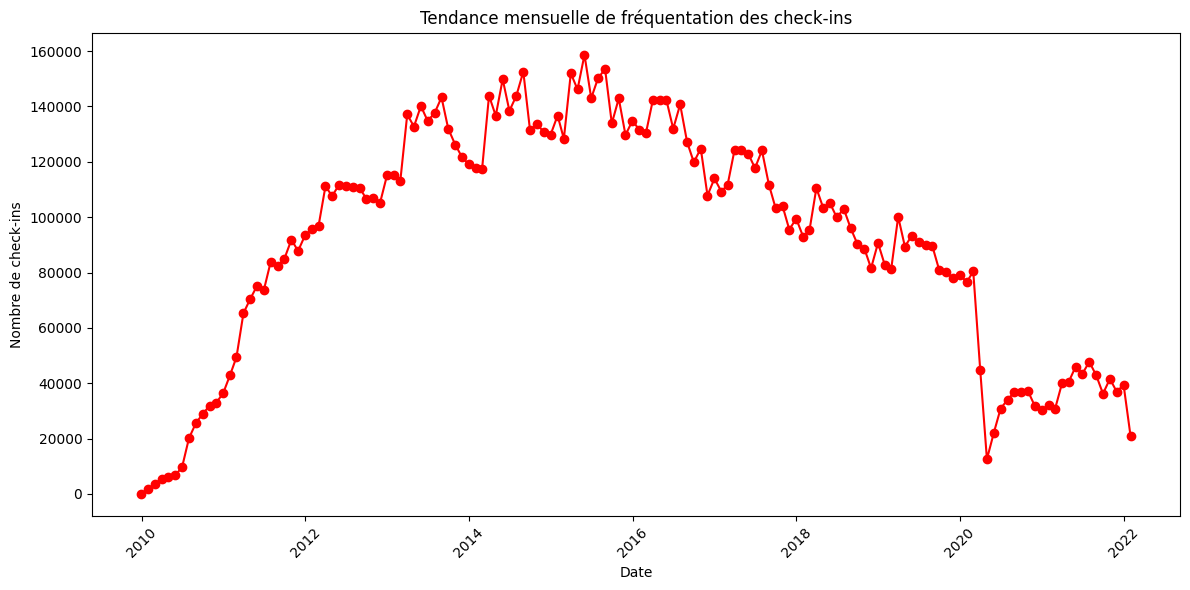

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# 1. Chargement et préparation des données
# ----------------------------

# Chargement du dataset des check-ins
df_checkin = pd.read_parquet('/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder/yelp_academic_dataset_checkin.parquet')

# La colonne 'date' contient plusieurs timestamps séparés par des virgules
# On sépare ces timestamps et on "explode" le DataFrame pour obtenir une ligne par timestamp
df_checkin['date'] = df_checkin['date'].str.split(',')
df_checkin = df_checkin.explode('date')
df_checkin['date'] = df_checkin['date'].str.strip()

# Conversion en datetime en spécifiant le format attendu (par ex: "2020-03-13 21:10:56")
df_checkin['date'] = pd.to_datetime(df_checkin['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Suppression des lignes où la conversion a échoué
df_checkin = df_checkin.dropna(subset=['date'])

# ----------------------------
# 2. Analyse temporelle de la fréquentation
# ----------------------------

# On définit la colonne 'date' comme index pour faciliter le regroupement par période
df_checkin.set_index('date', inplace=True)

# a) Agrégation quotidienne : nombre de check-ins par jour
daily_counts = df_checkin.resample('D').size()

# b) Agrégation mensuelle : nombre de check-ins par mois
monthly_counts = df_checkin.resample('M').size()

# ----------------------------
# 3. Visualisation
# ----------------------------

# Graphique : Tendance mensuelle
plt.figure(figsize=(12,6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', color='red')
plt.xlabel("Date")
plt.ylabel("Nombre de check-ins")
plt.title("Tendance mensuelle de fréquentation des check-ins")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyse des Tips

Aperçu du dataset des Tips:


business_id  compliment_count                 date  \
0  3uLgwr0qeCNMjKenHJwPGQ                 0  2012-05-18 02:17:21   
1  QoezRbYQncpRqyrLH6Iqjg                 0  2013-02-05 18:35:10   
2  MYoRNLb5chwjQe3c_k37Gg                 0  2013-08-18 00:56:08   
3  hV-bABTK-glh5wj31ps_Jw                 0  2017-06-27 23:05:38   
4  _uN0OudeJ3Zl_tf6nxg5ww                 0  2012-10-06 19:43:09   

                                                text                 user_id  
0                     Avengers time with the ladies.  AGNUgVwnZUey3gcPCJ76iw  
1  They have lots of good deserts and tasty cuban...  NBN4MgHP9D3cw--SnauTkA  
2             It's open even when you think it isn't  -copOvldyKh1qr-vzkDEvw  
3                          Very decent fried chicken  FjMQVZjSqY8syIO-53KFKw  
4             Appetizers.. platter special for lunch  ld0AperBXk1h6UbqmM80zw


Volume de Tips par entreprise (aperçu) :


business_id  tip_count
0  ---kPU91CF4Lq2-WlRu9Lw          4
1  --0iUa4sNDFiZFrAdIWhZQ          6
2  --30_8IhuyMHbSOcNWd6DQ          1
3  --7PUidqRWpRSpXebiyxTg          3
4  --8IbOsAAxjKRoYsBFL-PA          4

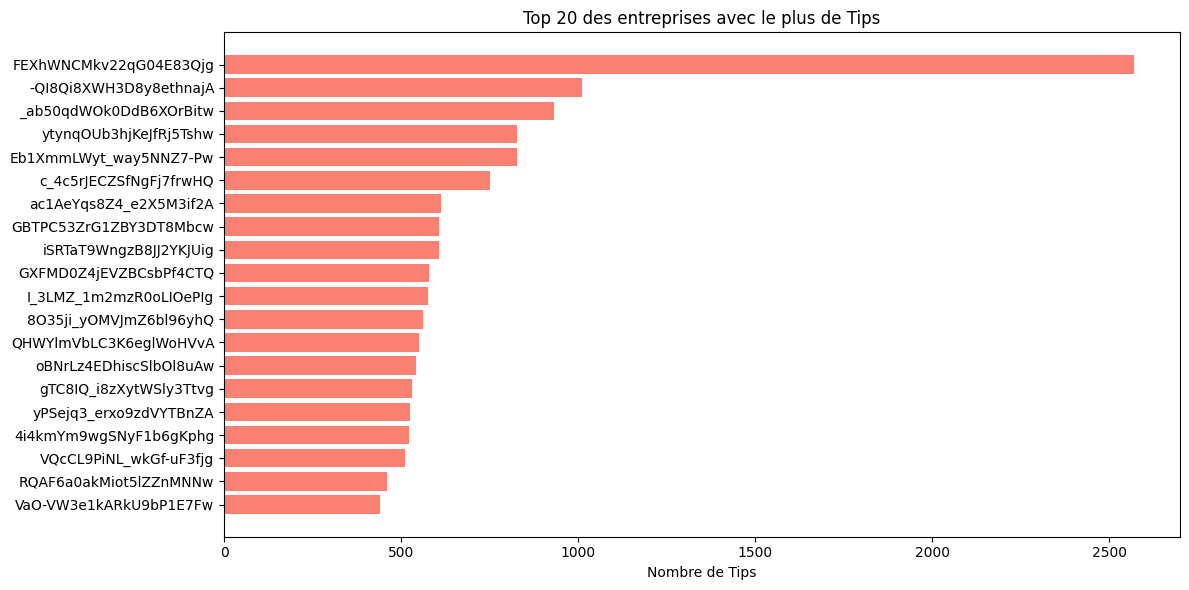

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# ----------------------------
# 1. Chargement du dataset des Tips
# ----------------------------
df_tip = pd.read_parquet('/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder/yelp_academic_dataset_tip.parquet')

# Vérifier les premières lignes
print("Aperçu du dataset des Tips:")
display(df_tip.head())

# ----------------------------
# 2. Calcul du volume de tips par entreprise
# ----------------------------
# Comptage du nombre de tips par business_id
tips_per_business = df_tip.groupby('business_id').size().reset_index(name='tip_count')

# Afficher quelques lignes du résultat
print("\nVolume de Tips par entreprise (aperçu) :")
display(tips_per_business.head())

# ----------------------------
# 4. Visualisation du top 20 des entreprises avec le plus de Tips
# ----------------------------
top20_tips = tips_per_business.sort_values(by='tip_count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.barh(top20_tips['business_id'], top20_tips['tip_count'], color='salmon')
plt.xlabel("Nombre de Tips")
plt.title("Top 20 des entreprises avec le plus de Tips")
plt.gca().invert_yaxis()  # Inverser pour avoir le top en haut
plt.tight_layout()
plt.show()

# Optionnel : Affichage du top 20 sous forme de tableau HTML
display(HTML(top20_tips.to_html(index=False, classes="table table-striped", border=0)))

Analyse nb de tips/avis : engagement ?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# ----------------------------
# 1. Chargement des datasets
# ----------------------------

# Chargement du dataset des tips
df_tip = pd.read_parquet('/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder/yelp_academic_dataset_tip.parquet')

# Chargement du dataset des avis
df_review = pd.read_parquet('/content/drive/MyDrive/largeScaleProcessing/Yelp JSON/extracted_folder/yelp_academic_dataset_review.parquet')

# ----------------------------
# 2. Agrégation par entreprise
# ----------------------------

# Volume de tips par entreprise
tips_per_business = df_tip.groupby('business_id').size().reset_index(name='tip_count')

# Volume d'avis par entreprise
reviews_per_business = df_review.groupby('business_id').size().reset_index(name='review_count')

# ----------------------------
# 3. Fusion et calcul du ratio
# ----------------------------

# Fusionner les deux agrégations sur 'business_id'
df_comparison = pd.merge(reviews_per_business, tips_per_business, on='business_id', how='outer')
df_comparison.fillna(0, inplace=True)  # Remplacer les valeurs manquantes par 0

# Calculer le ratio tips/avis pour chaque entreprise
# Pour éviter la division par zéro, on fixe le ratio à 0 quand review_count == 0
df_comparison['tip_review_ratio'] = df_comparison.apply(
    lambda row: row['tip_count'] / row['review_count'] if row['review_count'] > 0 else 0, axis=1
)

# ----------------------------
# 4. Visualisation
# ----------------------------

# Graphique 1 : Nuage de points (scatter plot) entre le nombre d'avis et le nombre de tips
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_comparison, x='review_count', y='tip_count', alpha=0.6)
plt.xlabel("Nombre d'avis")
plt.ylabel("Nombre de tips")
plt.title("Comparaison entre le nombre d'avis et de tips par entreprise")
plt.tight_layout()
plt.show()

# Graphique 2 : Histogramme du ratio tips/avis
plt.figure(figsize=(10, 6))
sns.histplot(df_comparison['tip_review_ratio'], bins=30, kde=True, color='purple')
plt.xlabel("Ratio Tips / Avis")
plt.title("Distribution du ratio Tips / Avis")
plt.tight_layout()
plt.show()

# Optionnel : Affichage d'un aperçu des données fusionnées dans un tableau HTML
display(HTML(df_comparison.head(20).to_html(index=False, classes="table table-striped", border=0)))

# Partie ML

In [ ]:
dfBusiness = spark.read.parquet("parquet_data/yelp_academic_dataset_business.parquet")
dfCheckin = spark.read.parquet("parquet_data/yelp_academic_dataset_checkin.parquet")
dfReview = spark.read.parquet("parquet_data/yelp_academic_dataset_review.parquet")
dfTip = spark.read.parquet("parquet_data/yelp_academic_dataset_tip.parquet")
dfUser = spark.read.parquet("parquet_data/yelp_academic_dataset_user.parquet")

In [ ]:
from pyspark.sql.functions import when, col
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

In [ ]:
# Create the sentiment label (positive or negative)
df_review = dfReview.withColumn("sentiment", when(col("stars") >= 3, 1).otherwise(0))

# Select relevant columns
df_review = df_review.select("text", "sentiment")


In [ ]:
# We consider only 5% of the data
df_review_reduite = df_review.sample(withReplacement=False,fraction=0.05, seed=42)


In [ ]:
# Split the data into training and testing sets
train_data, test_data = df_review_reduite.randomSplit([0.8, 0.2], seed=42)

In [ ]:
# Define the stages of the NLP pipeline
tokenizer = Tokenizer(inputCol="text", outputCol="tokens")
stopwords_remover = StopWordsRemover(inputCol="tokens", outputCol="filtered_tokens")
hashingTF = HashingTF(inputCol="filtered_tokens", outputCol="rawFeatures")
idf = IDF(inputCol="rawFeatures", outputCol="features")
lr = LogisticRegression(featuresCol="features", labelCol="sentiment")

# Create the pipeline
pipeline = Pipeline(stages=[tokenizer, stopwords_remover, hashingTF, idf, lr])

In [ ]:
# Train the model
from tqdm.auto import tqdm
with tqdm(total=train_data.count(), desc="Training Model") as pbar:
    model = pipeline.fit(train_data, {lr.params[0]: 1000})
    pbar.update(train_data.count())


Training Model:   0%|          | 0/279040 [00:00<?, ?it/s]

In [ ]:
# Make predictions on the test data
predictions = model.transform(test_data)

In [ ]:
# Evaluate the model
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="sentiment", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)

print(f"AUC: {auc}")


In [ ]:
# Evaluate the model
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="sentiment", rawPredictionCol="rawPrediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Accuracy: {accuracy}")
